In [1]:

#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [2]:

#read Education csv file and review the sample rows
edu_data = pd.read_csv("Resources/EducationReport.csv")
#create a new dataframe with only needed columns for years 2014-2018
edu_data_df = pd.DataFrame(edu_data)
edu_data_mycolm = edu_data_df[["Unnamed: 0", "Total.4", "Urban.4", "Rural.4"]]
#renamed the columns to have more meaningful names
edu_data_upd = edu_data_mycolm.rename(columns={"Unnamed: 0" : "area_name", "Total.4" : "Total Edu 2014-18", "Urban.4" : "Total Edu Urban 2024-18", "Rural.4" : "Total Edu Rural 2014-18"})
#dropped the first row of the data set with column titles for consistency
edu_data_final = edu_data_upd.drop([0,1], axis=0)
edu_data_final.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18
2,Alabama,24.90%,28.00%,15.20%
3,Alaska,29.20%,31.80%,23.90%
4,Arizona,28.90%,29.60%,15.80%


In [3]:
unempl_data = pd.read_csv("Resources/Unemployment.csv", encoding="ISO-8859-1")


In [4]:
#create the column with average data for years 2014-18 and add it to the dataset
unempl_data["Average Unempl 2014-18"] =(unempl_data["Unemployment_rate_2018"] + unempl_data["Unemployment_rate_2017"]
+ unempl_data["Unemployment_rate_2016"] + unempl_data["Unemployment_rate_2015"] + 
unempl_data["Unemployment_rate_2014"])/4
unempl_data.head(3)

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18
0,0,US,United States,NaN,NaN,NaN,"142,601,667","136,904,680","5,696,987",4.0,...,"155,102,319","6,286,707",3.9,"163,100,055","157,115,247","5,984,808",3.7,"61,937",NaN,6.100
1,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"2,130,845","85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.725
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"21,720","20,846",874,4.0,...,"25,261",935,3.6,"26,172","25,458",714,2.7,"59,338",119.0,5.850


In [5]:
#filter dataset to the state level - remove counties (the columns "rural urban code" & "metro 2013" are empty for the states)
unempl_data['Rural_urban_continuum_code_2013'].replace('', np.nan, inplace=True)
unempl_state_interim = unempl_data[unempl_data['Rural_urban_continuum_code_2013'].isnull()]
unempl_state_interim
unempl_data_clean = unempl_state_interim[unempl_state_interim['Metro_2013']!=0]
unempl_data_clean.head(3)

,FIPStxt,Stabr,area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Average Unempl 2014-18
0,0,US,United States,NaN,NaN,NaN,"142,601,667","136,904,680","5,696,987",4.0,...,"155,102,319","6,286,707",3.9,"163,100,055","157,115,247","5,984,808",3.7,"61,937",NaN,6.100
1,1000,AL,Alabama,NaN,NaN,NaN,"2,133,223","2,035,594","97,629",4.6,...,"2,130,845","85,782",3.9,"2,241,747","2,174,483","67,264",3.0,"49,881",100.0,6.725
69,2000,AK,Alaska,NaN,NaN,NaN,"319,511","299,146","20,365",6.4,...,"329,901","22,761",6.5,"347,779","326,430","21,349",6.1,"74,912",100.0,8.550


In [6]:
#pick the average column for years 2014-2018
unempl_data_mycolm = unempl_data_clean[["area_name", "Average Unempl 2014-18"]]
unempl_data_mycolm.head(3)

,area_name,Average Unempl 2014-18
0,United States,6.100
1,Alabama,6.725
69,Alaska,8.550


In [7]:
# Kamran poverty work
load_poverty = ("Resources/PovertyReport.csv")
poverty_df = pd.read_csv(load_poverty)
poverty_df = poverty_df.drop(columns={"Textbox98", "Textbox99", "total_est_pct_Bmin2",
                                     "total_est_pct_Bmax2", "under18_pct_Bmin2", "under18_pct_Bmax2"})
poverty_df = poverty_df.rename(columns={"state_National": "area_name",
                                       "total_est_pct2": "Poverty (2018)",
                                       "under18_pct2": "Under 18 in Poverty (2018)"})
poverty_df.head(3)

,area_name,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,16.8,23.9
1,Alaska,11.1,14.5
2,Arizona,14.1,20.4


In [8]:
#formatting the dataset - add the "%" signs
poverty_df["Poverty (2018)"] = poverty_df["Poverty (2018)"].map("{:.2f}%".format)
poverty_df["Under 18 in Poverty (2018)"] = poverty_df["Under 18 in Poverty (2018)"].map("{:.2f}%".format)
poverty_df.head(3)

,area_name,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,16.80%,23.90%
1,Alaska,11.10%,14.50%
2,Arizona,14.10%,20.40%


In [9]:
#add and read the hate crime file
hate_crime = ("Resources/hate_crimes538.csv")
hate_crime_df = pd.read_csv(hate_crime)
hate_crime_df.head(3)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928


In [10]:
#pick the needed columns from the hate crime file
hate_crime_colm = hate_crime_df[["state", "median_household_income", "hate_crimes_per_100k_splc"]]
hate_crime_colm = hate_crime_colm.rename(columns={"state" : "area_name"})
hate_crime_colm.head(3)

,area_name,median_household_income,hate_crimes_per_100k_splc
0,Alabama,42278,0.125839
1,Alaska,67629,0.143740
2,Arizona,49254,0.225320


In [11]:
# Merge the Education Dataframe with Enemployment Dataframe
merged_df = pd.merge(edu_data_final,unempl_data_mycolm, on="area_name")
merged_df.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18
0,Alabama,24.90%,28.00%,15.20%,6.725
1,Alaska,29.20%,31.80%,23.90%,8.550
2,Arizona,28.90%,29.60%,15.80%,6.950


In [12]:
#add Poverty Dataframe to the merged data
merged_df1 = pd.merge(merged_df, poverty_df, on="area_name")
merged_df1.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018)
0,Alabama,24.90%,28.00%,15.20%,6.725,16.80%,23.90%
1,Alaska,29.20%,31.80%,23.90%,8.550,11.10%,14.50%
2,Arizona,28.90%,29.60%,15.80%,6.950,14.10%,20.40%


In [13]:
#ready for the final code
#add the Hate Crime data to the merged dataframe

merged_df_fin = pd.merge(merged_df1,hate_crime_colm, on="area_name")
merged_df_fin.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc
0,Alabama,24.90%,28.00%,15.20%,6.725,16.80%,23.90%,42278,0.125839
1,Alaska,29.20%,31.80%,23.90%,8.550,11.10%,14.50%,67629,0.143740
2,Arizona,28.90%,29.60%,15.80%,6.950,14.10%,20.40%,49254,0.225320


In [14]:
#read Education csv file and review the sample rows
region_data= pd.read_csv("Resources/Regions.csv")
region_data.head()

,area_name,region
0,Alabama,Southeast
1,Alaska,West
2,Arizona,Southwest
3,Arkansas,Southeast
4,California,West


In [15]:
# occurrence of Hate Crimes to Education (Bachelor's Degree vs. High School) by State
final_merge=pd.merge(merged_df_fin,region_data, on="area_name")
final_merge.head(3)

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc,region
0,Alabama,24.90%,28.00%,15.20%,6.725,16.80%,23.90%,42278,0.125839,Southeast
1,Alaska,29.20%,31.80%,23.90%,8.550,11.10%,14.50%,67629,0.143740,West
2,Arizona,28.90%,29.60%,15.80%,6.950,14.10%,20.40%,49254,0.225320,Southwest


In [16]:
# group by regions
region_merge=final_merge.groupby("region")
region_merge.describe()

Average Unempl 2014-18                                             \
                           count      mean       std    min      25%    50%   
region                                                                        
Midwest                     13.0  5.215385  1.144531  3.525  4.37500  5.175   
Northeast                   13.0  5.948077  1.149205  3.875  5.42500  6.250   
Southeast                   10.0  6.512500  0.732030  5.250  6.16875  6.600   
Southwest                    4.0  6.350000  1.220143  5.225  5.39375  6.200   
West                        11.0  5.847727  1.468054  4.075  4.62500  5.375   

                          median_household_income                ...  \
               75%    max                   count          mean  ...   
region                                                           ...   
Midwest    6.32500  7.025                    13.0  54713.230769  ...   
Northeast  6.62500  8.175                    13.0  61490.692308  ...   
Southeast  7.03750  7.525                    10.0  45702.900000  ...   
Southwest  7.15625  7.775                     4.0  49253.500000  ...   
West       6.83750  8.550                    11.0  59246.363636  ...   

                             hate_crimes_per_100k_splc                      \
                75%      max                     count      mean       std   
region                                                                       
Midwest    57810.00  67244.0                      11.0  0.283501  0.155453   
Northeast  68277.00  76165.0                      13.0  0.407100  0.374744   
Southeast  46623.00  66155.0                      10.0  0.181589  0.103606   
Southwest  50409.25  53875.0                       4.0  0.216836  0.066046   
West       62161.50  71223.0                       9.0  0.355369  0.263226   

                                                             
                min       25%       50%       75%       max  
region                                                       
Midwest    0.105152  0.187619  0.226197  0.364088  0.627480  
Northeast  0.078306  0.209894  0.324149  0.370439  1.522302  
Southeast  0.067447  0.112405  0.156680  0.232990  0.363249  
Southwest  0.133629  0.193595  0.219452  0.242693  0.294811  
West       0.124208  0.141673  0.255805  0.495491  0.832850  

[5 rows x 24 columns]

In [17]:
count_region=region_merge["hate_crimes_per_100k_splc"].mean()
count_region

region
Midwest      0.283501
Northeast    0.407100
Southeast    0.181589
Southwest    0.216836
West         0.355369
Name: hate_crimes_per_100k_splc, dtype: float64

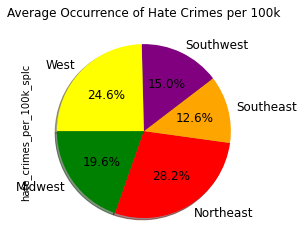

In [18]:
# Look at occurences of Hate Crimes across regions
count_region.plot(kind='pie', y='region', \
                        title="Average Occurrence of Hate Crimes per 100k",startangle=180,\
                        autopct='%1.1f%%',shadow=True, fontsize=12, colors =["green","red", "orange","purple", "yellow"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.show()

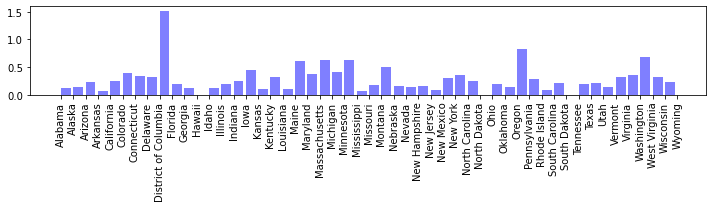

In [19]:

x_axis=final_merge["area_name"]
tick_locations=x_axis
y_axis =final_merge['hate_crimes_per_100k_splc']
plt.figure(figsize=(10,3))
plt.bar(x_axis, y_axis, color="b",  alpha=0.5, align="edge")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.tight_layout()
# plt.show()

In [25]:
region_df=final_merge.groupby(['region'])
region_df.dtypes

,area_name,Total Edu 2014-18,Total Edu Urban 2024-18,Total Edu Rural 2014-18,Average Unempl 2014-18,Poverty (2018),Under 18 in Poverty (2018),median_household_income,hate_crimes_per_100k_splc
region,,,,,,,,,
Midwest,object,object,object,object,float64,object,object,int64,float64
Northeast,object,object,object,object,float64,object,object,int64,float64
Southeast,object,object,object,object,float64,object,object,int64,float64
Southwest,object,object,object,object,float64,object,object,int64,float64
West,object,object,object,object,float64,object,object,int64,float64


In [29]:
region_df[["Total Edu 2014-18", "Poverty (2018)"]]= region_df.astype(float)


AttributeError: 'DataFrameGroupBy' object has no attribute 'astype'

In [21]:
width = .35 # width of a bar

region_df[['Total Edu 2014-18','Poverty (2018)']].plot(kind='bar', width = width)
region_df['hate_crimes_per_100k_splc'].plot(secondary_y=True)


# ax = plt.gca()
# plt.xlim([-width, len(region_df)-width])
# ax.set_xticklabels['region']
# # Create a title, x label, and y label for our chart
# plt.title("Education and Poverty vs. Hate Crime occurrence ( avg 2014-2018) ")
# # plt.ylabel("Tumor Volume (mm3)")

plt.show()

TypeError: no numeric data to plot

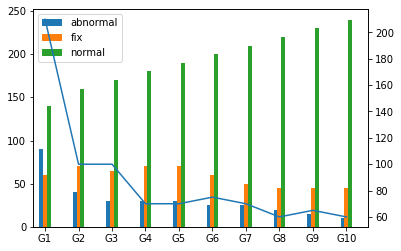

In [30]:
width = .35 # width of a bar

m1_t = pd.DataFrame({
 'abnormal' : [90,40,30,30,30,25,25,20,15,10],
 'fix' : [60,70,65,70,70,60,50,45,45,45],
 'normal' : [140,160,170,180,190,200,210,220,230,240],
 'bad_rate' : [210,100,100,70,70,75,70,60,65,60]})

m1_t[['abnormal','fix','normal']].plot(kind='bar', width = width)
m1_t['bad_rate'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(m1_t['normal'])-width])
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'))

plt.show()
